In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
churn_data = pd.read_csv('churn_data.csv')
customer_data = pd.read_csv('customer_data.csv')
internet_data = pd.read_csv('internet_data.csv')

In [4]:
df_1 = pd.merge(churn_data,customer_data,how='inner',on='customerID')

In [5]:
telecom = pd.merge(df_1,internet_data,how='inner',on='customerID')

In [6]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [7]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [8]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [9]:
telecom['PhoneService'] = telecom['PhoneService'].map({'Yes':1,'No':0})
telecom['PaperlessBilling'] = telecom['PaperlessBilling'].map({'Yes':1,'No':0})
telecom['Churn'] = telecom['Churn'].map({'Yes':1,'No':0})
telecom['Partner'] = telecom['Partner'].map({'Yes':1,'No':0})
telecom['Dependents'] = telecom['Dependents'].map({'Yes':1,'No':0})

In [10]:
# Creating a dummy variable for the variable 'Contract' and dropping the first one.
cont = pd.get_dummies(telecom['Contract'],prefix='Contract',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,cont],axis=1)

# Creating a dummy variable for the variable 'PaymentMethod' and dropping the first one.
pm = pd.get_dummies(telecom['PaymentMethod'],prefix='PaymentMethod',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,pm],axis=1)

# Creating a dummy variable for the variable 'gender' and dropping the first one.
gen = pd.get_dummies(telecom['gender'],prefix='gender',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,gen],axis=1)

# Creating a dummy variable for the variable 'MultipleLines' and dropping the first one.
ml = pd.get_dummies(telecom['MultipleLines'],prefix='MultipleLines')
#  dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1],axis=1)

# Creating a dummy variable for the variable 'InternetService' and dropping the first one.
iser = pd.get_dummies(telecom['InternetService'],prefix='InternetService',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,iser],axis=1)

# Creating a dummy variable for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'],prefix='OnlineSecurity')
os1= os.drop(['OnlineSecurity_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,os1],axis=1)

# Creating a dummy variable for the variable 'OnlineBackup'.
ob =pd.get_dummies(telecom['OnlineBackup'],prefix='OnlineBackup')
ob1 =ob.drop(['OnlineBackup_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1],axis=1)

# Creating a dummy variable for the variable 'DeviceProtection'. 
dp =pd.get_dummies(telecom['DeviceProtection'],prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1],axis=1)

# Creating a dummy variable for the variable 'TechSupport'. 
ts =pd.get_dummies(telecom['TechSupport'],prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1],axis=1)

# Creating a dummy variable for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'],prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,st1],axis=1)

# Creating a dummy variable for the variable 'StreamingMovies'. 
sm =pd.get_dummies(telecom['StreamingMovies'],prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1],axis=1)


In [11]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_No,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No,1,0,0,0,1,1,1,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No,0,0,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [12]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [13]:
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'],errors='coerce')

In [14]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [15]:
telecom['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [16]:
num_telecom = telecom[['tenure','MonthlyCharges','TotalCharges']]

In [17]:
num_telecom.describe(percentiles=[0.25,0.50,0.75,0.90,0.95,0.99])

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
90%,69.000000,102.600000,5976.640000
95%,72.000000,107.400000,6923.590000
99%,72.000000,114.729000,8039.883000


In [18]:
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
MultipleLines_No                          0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

In [19]:
100*(round(telecom.isnull().sum()/len(telecom.index),4))

customerID                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                

In [20]:
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [21]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_No,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [22]:
df = telecom[['tenure','MonthlyCharges','TotalCharges']]

In [23]:
normalized_df = (df-df.mean())/df.std()

In [24]:
telecom = telecom.drop(['tenure','MonthlyCharges','TotalCharges'],axis=1)

In [25]:
telecom = pd.concat([telecom,normalized_df],axis=1)

In [26]:
telecom.head()

,customerID,PhoneService,PaperlessBilling,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_No,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,-1.280157,-1.161611,-0.994123
1,5575-GNVDE,1,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0.064298,-0.260859,-0.173727
2,3668-QPYBK,1,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0,-1.239416,-0.363897,-0.959581
3,7795-CFOCW,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0.512450,-0.747797,-0.195234
4,9237-HQITU,1,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,-1.239416,0.196164,-0.940391


In [27]:
churn = round(100*(sum(telecom['Churn']/len(telecom['Churn'].index))),2)

In [28]:
print(churn)

26.58


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = telecom.drop(['Churn','customerID'],axis=1)
y = telecom['Churn']

In [31]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [33]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4922, 30), (2110, 30), (4922,), (2110,))

In [34]:
import statsmodels.api as sm

In [35]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Thu, 25 Jun 2020   Deviance:                       4009.4
Time:                        18:59:28   Pearson chi2:                 6.07e+03
No. Iterations:                    15                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.2783      1.187     -2.762      0.006      -5.605      -0.952
PhoneService                              0.8213      0.588      1.396      0.163      -0.332       1.974
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
MultipleLines_No                          0.1295      0.205      0.632      0.527      -0.272       0.531
MultipleLines_Yes                         0.6918      0.392      1.763      0.078      -0.077       1.461
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -3.4348      1.324     -2.594      0.009      -6.030      -0.839
OnlineSecurity_No                         0.0905      0.058      1.558      0.119      -0.023       0.204
OnlineSecurity_Yes                        0.0660      0.174      0.380      0.704      -0.275       0.407
OnlineBackup_No                          -0.0088      0.055     -0.161      0.872      -0.116       0.098
OnlineBackup_Yes                          0.1653      0.172      0.960      0.337      -0.172       0.503
DeviceProtection_No                      -0.0832      0.056     -1.487      0.137      -0.193       0.026
DeviceProtection_Yes                      0.2397      0.174      1.379      0.168      -0.101       0.580
TechSupport_No                            0.0935      0.058      1.604      0.109      -0.021       0.208
TechSupport_Yes                           0.0630      0.174      0.362      0.717      -0.278       0.404
StreamingTV_No                           -0.4016      0.133     -3.027      0.002      -0.662      -0.142
StreamingTV_Yes                           0.5581      0.267      2.094      0.036       0.036       1.081
Streaming

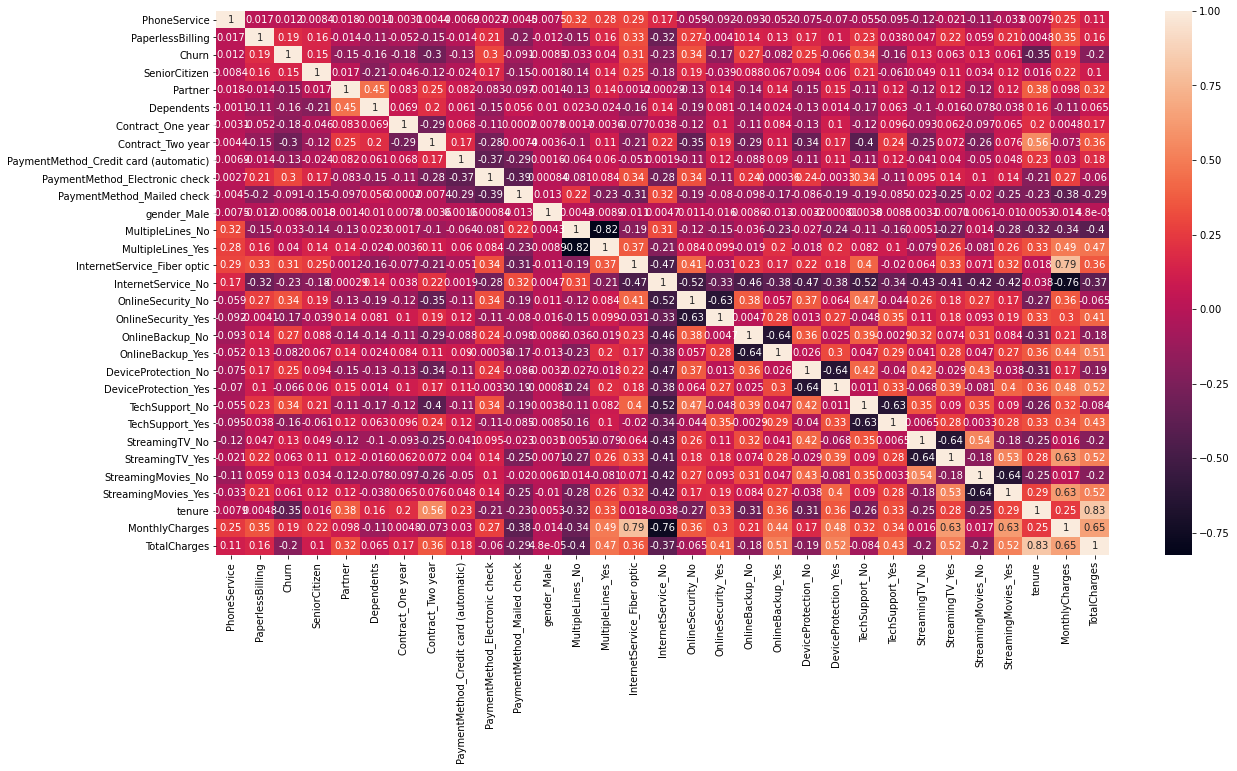

In [36]:
plt.figure(figsize=(20,10))
sns.heatmap(telecom.corr(),annot=True)
plt.show()

In [37]:
X_test2 = X_test.drop(['tenure','MonthlyCharges','TotalCharges'],axis=1)
X_train2 = X_train.drop(['tenure','MonthlyCharges','TotalCharges'],axis=1)

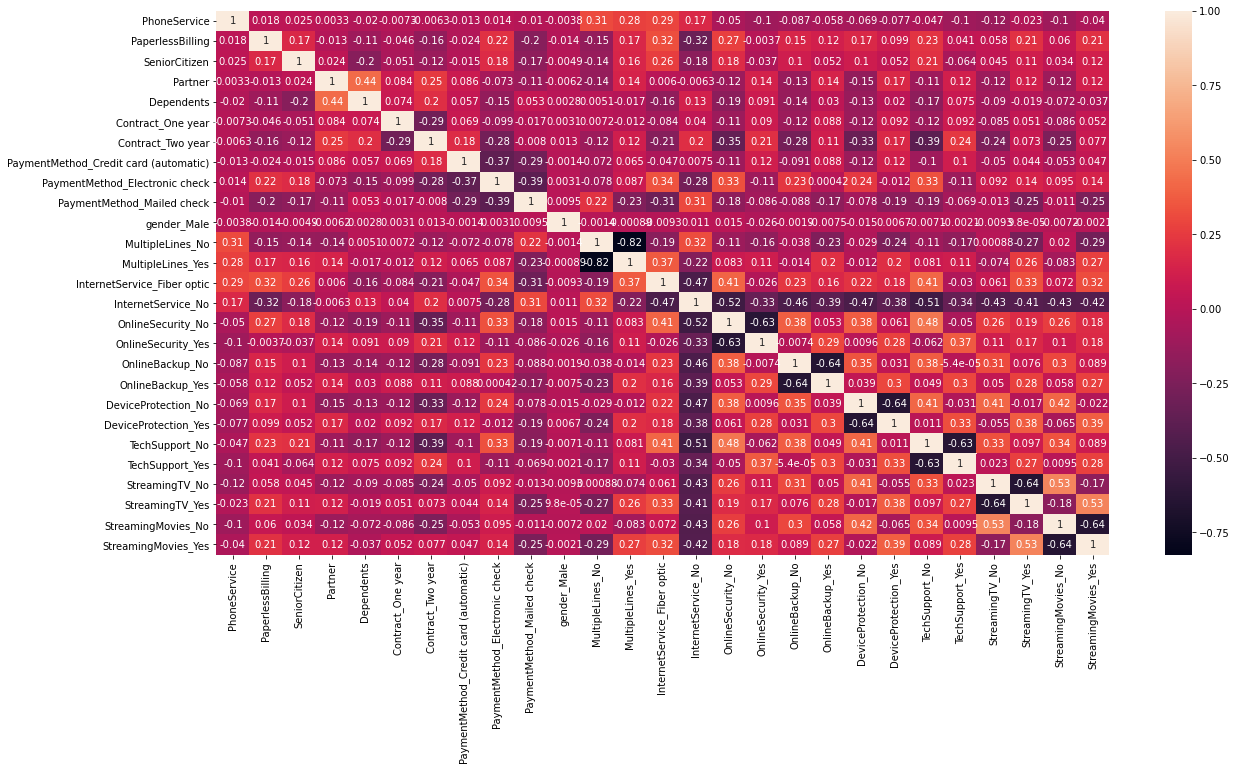

In [38]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train2.corr(),annot=True)
plt.show()

In [39]:
X_test2 = X_test2.drop(['StreamingMovies_No'],axis=1)
X_train2 = X_train2.drop(['StreamingMovies_No'],axis=1)

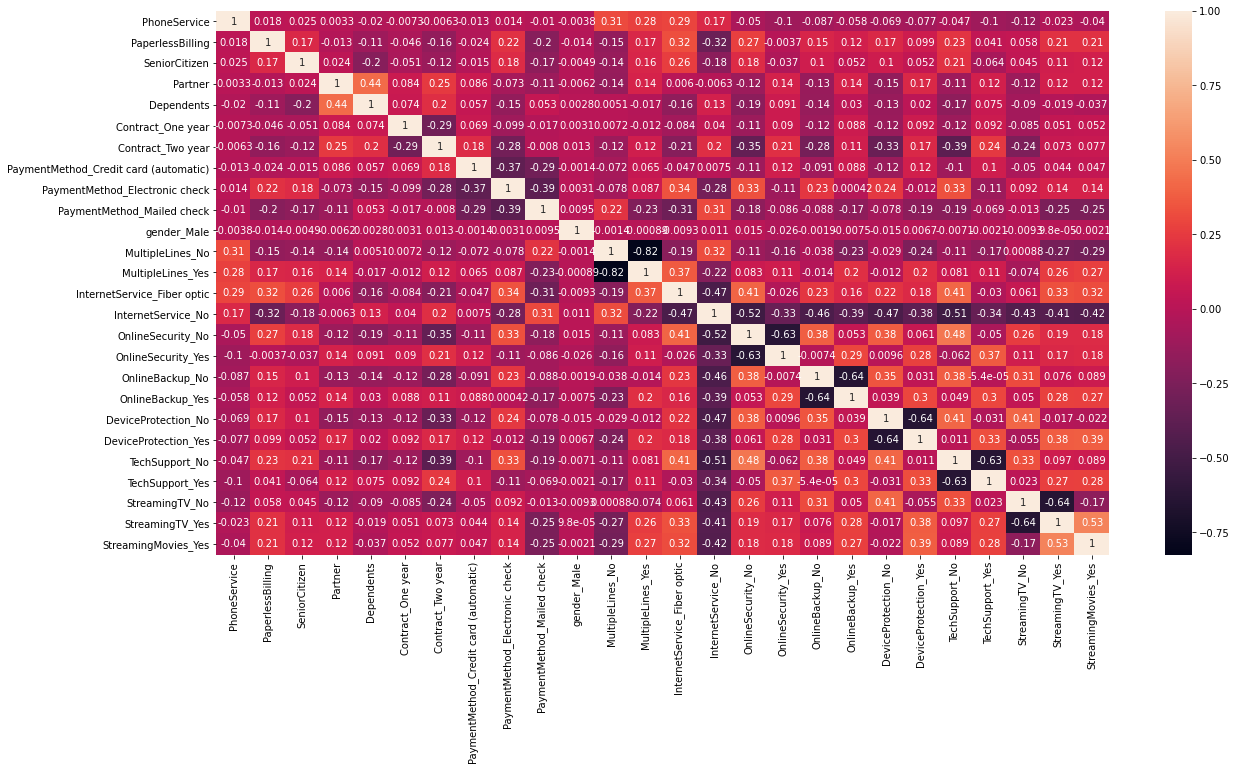

In [40]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train2.corr(),annot=True)
plt.show()

In [41]:
logm2 = sm.GLM(y_train,(sm.add_constant(X_train2)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4901
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2096.4
Date:                Thu, 25 Jun 2020   Deviance:                       4192.7
Time:                        18:59:49   Pearson chi2:                 4.96e+03
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.8834      0.119     -7.423      0.000      -1.117      -0.650
PhoneService                             -0.1280      0.100     -1.279      0.201      -0.324       0.068
PaperlessBilling                          0.2753      0.088      3.136      0.002       0.103       0.447
SeniorCitizen                             0.2885      0.098      2.951      0.003       0.097       0.480
Partner                                  -0.2185      0.088     -2.472      0.013      -0.392      -0.045
Dependents                               -0.1348      0.104     -1.292      0.196      -0.339       0.070
Contract_One year                        -1.2389      0.118    -10.467      0.000      -1.471      -1.007
Contract_Two year                        -2.1691      0.193    -11.226      0.000      -2.548      -1.790
PaymentMethod_Credit card (automatic)    -0.2309      0.133     -1.731      0.083      -0.492       0.030
PaymentMethod_Electronic check            0.3419      0.109      3.139      0.002       0.128       0.555
PaymentMethod_Mailed check                0.0592      0.132      0.448      0.654      -0.200       0.318
gender_Male                              -0.0593      0.076     -0.777      0.437      -0.209       0.090
MultipleLines_No                         -0.0361      0.063     -0.570      0.569      -0.160       0.088
MultipleLines_Yes                        -0.0919      0.070     -1.308      0.191      -0.229       0.046
InternetService_Fiber optic               0.7254      0.107      6.764      0.000       0.515       0.936
InternetService_No                       -0.7876      0.115     -6.868      0.000      -1.012      -0.563
OnlineSecurity_No                         0.2164      0.051      4.235      0.000       0.116       0.316
OnlineSecurity_Yes                       -0.3121      0.056     -5.550      0.000      -0.422      -0.202
OnlineBackup_No                           0.1494      0.046      3.252      0.001       0.059       0.239
OnlineBackup_Yes                         -0.2452      0.050     -4.875      0.000      -0.344      -0.147
DeviceProtection_No                       0.0175      0.047      0.372      0.710      -0.075       0.110
DeviceProtection_Yes                     -0.1133      0.053     -2.154      0.031      -0.216      -0.010
TechSupport_No                            0.1632      0.051      3.192      0.001       0.063       0.263
TechSupport_Yes                          -0.2590      0.057     -4.578      0.000      -0.370      -0.148
StreamingTV_No                           -0.1590      0.047     -3.405      0.001      -0.250      -0.067
StreamingTV_Yes                           0.0632      0.054      1.165      0.244      -0.043       0.170
Streaming

In [42]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg,13)
rfe = rfe.fit(X,y)
print(list(zip(X.columns,rfe.support_,rfe.ranking_)))

C:\Users\LENOVO\anaconda3\envs\credit_risk_model\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=13 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\LENOVO\anaconda3\envs\credit_risk_model\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[('PhoneService', False, 5), ('PaperlessBilling', True, 1), ('SeniorCitizen', False, 3), ('Partner', False, 18), ('Dependents', False, 4), ('Contract_One year', True, 1), ('Contract_Two year', True, 1), ('PaymentMethod_Credit card (automatic)', False, 11), ('PaymentMethod_Electronic check', True, 1), ('PaymentMethod_Mailed check', False, 12), ('gender_Male', False, 17), ('MultipleLines_No', True, 1), ('MultipleLines_Yes', False, 16), ('InternetService_Fiber optic', True, 1), ('InternetService_No', True, 1), ('OnlineSecurity_No', True, 1), ('OnlineSecurity_Yes', False, 7), ('OnlineBackup_No', False, 6), ('OnlineBackup_Yes', False, 15), ('DeviceProtection_No', False, 9), ('DeviceProtection_Yes', False, 10), ('TechSupport_No', False, 2), ('TechSupport_Yes', False, 8), ('StreamingTV_No', False, 14), ('StreamingTV_Yes', True, 1), ('StreamingMovies_No', False, 13), ('StreamingMovies_Yes', True, 1), ('tenure', True, 1), ('MonthlyCharges', True, 1), ('TotalCharges', True, 1)]


In [43]:
a = list(zip(X.columns,rfe.support_,rfe.ranking_))

In [45]:
col = [col[0] for col in a if col[1] == True ]

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logsk = LogisticRegression()
logsk.fit(X_train[col],y_train)

LogisticRegression()

In [51]:
import statsmodels.api as sm
logm4 = sm.GLM(y_train,(sm.add_constant(X_train[col])),family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2024.4
Date:                Thu, 25 Jun 2020   Deviance:                       4048.8
Time:                        19:39:06   Pearson chi2:                 6.24e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.3139      0.161    -14.409      0.000      -2.629      -1.999
PaperlessBilling                   0.3484      0.089      3.900      0.000       0.173       0.523
Contract_One year                 -0.7457      0.127     -5.879      0.000      -0.994      -0.497
Contract_Two year                 -1.4176      0.208     -6.802      0.000      -1.826      -1.009
PaymentMethod_Electronic check     0.3639      0.083      4.404      0.000       0.202       0.526
MultipleLines_No                  -0.2912      0.087     -3.354      0.001      -0.461      -0.121
InternetService_Fiber optic        1.4491      0.203      7.153      0.000       1.052       1.846
InternetService_No                -1.0989      0.238     -4.624      0.000      -1.565      -0.633
OnlineSecurity_No                  0.3057      0.106      2.883      0.004       0.098       0.514
StreamingTV_Yes                    0.4489      0.111      4.026      0.000       0.230       0.667
StreamingMovies_Yes                0.3412      0.110      3.112      0.002       0.126       0.556
tenure                            -1.4715      0.185     -7.974      0.000      -1.833      -1.110
MonthlyCharges                    -0.6651      0.178     -3.732      0.000      -1.014      -0.316
TotalCharges                       0.7140      0.195      3.663      0.000       0.332       1.096
==================================================================================================
"""

In [52]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [56]:
telecom.columns
['PaperlessBilling',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Electronic check',
 'MultipleLines_No',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'StreamingTV_Yes',
 'StreamingMovies_Yes',
 'tenure',
 'MonthlyCharges',
 'TotalCharges']

['PaperlessBilling',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Electronic check',
 'MultipleLines_No',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'StreamingTV_Yes',
 'StreamingMovies_Yes',
 'tenure',
 'MonthlyCharges',
 'TotalCharges']

In [58]:
vif_cal(input_data=telecom.drop(['customerID','SeniorCitizen', 'Partner', 'Dependents',
                                 'PaymentMethod_Credit card (automatic)','PaymentMethod_Mailed check',
                                 'gender_Male','MultipleLines_Yes','OnlineSecurity_No','OnlineBackup_No',
                                 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
                                 'TechSupport_No','StreamingTV_No','StreamingTV_Yes','StreamingMovies_Yes',
                                 'MonthlyCharges'],axis=1),dependent_col='Churn')

,Var,Vif
0,PhoneService,10.87
12,TotalCharges,8.58
11,tenure,6.80
1,PaperlessBilling,2.61
7,InternetService_No,0.65
3,Contract_Two year,0.28
2,Contract_One year,0.24
9,TechSupport_Yes,0.24
8,OnlineSecurity_Yes,0.21
10,StreamingMovies_No,0.19


In [59]:
col = ['PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check','MultipleLines_No','InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes','TechSupport_Yes','StreamingMovies_No','tenure','TotalCharges']

In [60]:
import statsmodels.api as sm
logm5 = sm.GLM(y_train,(sm.add_constant(X_train[col])),family = sm.families.Binomial())
logm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4909
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2025.8
Date:                Thu, 25 Jun 2020   Deviance:                       4051.5
Time:                        19:44:25   Pearson chi2:                 6.00e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.1915      0.138     -8.607      0.000      -1.463      -0.920
PaperlessBilling                   0.3563      0.089      3.998      0.000       0.182       0.531
Contract_One year                 -0.6965      0.127     -5.483      0.000      -0.945      -0.448
Contract_Two year                 -1.3078      0.210     -6.230      0.000      -1.719      -0.896
PaymentMethod_Electronic check     0.3700      0.082      4.487      0.000       0.208       0.532
MultipleLines_No                  -0.2990      0.087     -3.442      0.001      -0.469      -0.129
InternetService_Fiber optic        0.7227      0.108      6.666      0.000       0.510       0.935
InternetService_No                -1.2732      0.175     -7.276      0.000      -1.616      -0.930
OnlineSecurity_Yes                -0.4100      0.102     -4.025      0.000      -0.610      -0.210
TechSupport_Yes                   -0.4202      0.101     -4.157      0.000      -0.618      -0.222
StreamingMovies_No                -0.2205      0.093     -2.366      0.018      -0.403      -0.038
tenure                            -1.4276      0.177     -8.066      0.000      -1.774      -1.081
TotalCharges                       0.6495      0.179      3.622      0.000       0.298       1.001
==================================================================================================
"""

In [61]:
# Calculating Vif value
vif_cal(input_data=telecom.drop(['customerID','PhoneService','SeniorCitizen', 'Partner', 'Dependents',
                                 'PaymentMethod_Credit card (automatic)','PaymentMethod_Mailed check',
                                 'gender_Male','MultipleLines_Yes','OnlineSecurity_No','OnlineBackup_No',
                                 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
                                 'TechSupport_No','StreamingTV_No','StreamingTV_Yes','StreamingMovies_Yes',
                                 'MonthlyCharges'], axis=1), dependent_col='Churn')

,Var,Vif
11,TotalCharges,8.24
10,tenure,6.56
0,PaperlessBilling,2.44
6,InternetService_No,0.45
2,Contract_Two year,0.26
8,TechSupport_Yes,0.24
1,Contract_One year,0.23
7,OnlineSecurity_Yes,0.21
9,StreamingMovies_No,0.17
3,PaymentMethod_Electronic check,0.05


In [62]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(X_train[col], y_train)

LogisticRegression()

In [68]:
y_pred = logsk.predict_proba(X_test[col])

In [69]:
y_pred_df = pd.DataFrame(y_pred)

In [70]:
y_pred_df

,0,1
0,0.502140,0.497860
1,0.629609,0.370391
2,0.993277,0.006723
3,0.363536,0.636464
4,0.992492,0.007508
5,0.325286,0.674714
6,0.821850,0.178150
7,0.994063,0.005937
8,0.317224,0.682776
9,0.881821,0.118179


In [71]:
y_pred_1 = y_pred_df.iloc[:,[1]]

In [72]:
y_pred_1

,1
0,0.497860
1,0.370391
2,0.006723
3,0.636464
4,0.007508
5,0.674714
6,0.178150
7,0.005937
8,0.682776
9,0.118179


In [73]:
y_test_df = pd.DataFrame(y_test)

In [74]:
y_test_df['CustID'] = y_test_df.index

In [75]:
y_test_df.head()

,Churn,CustID
942,0,942
3730,1,3730
1761,0,1761
2283,1,2283
1872,0,1872


In [76]:
y_pred_1.reset_index(drop=True,inplace=True)
y_test_df.reset_index(drop=True,inplace=True)

In [85]:
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

In [86]:
y_pred_final.head()

,Churn,CustID,1
0,0,942,0.497860
1,1,3730,0.370391
2,0,1761,0.006723
3,1,2283,0.636464
4,0,1872,0.007508


In [95]:
y_pred_final['Churn_Prob'] = y_pred_final.iloc[:,[2]]

In [98]:
y_pred_final.drop(y_pred_final.iloc[:,[2]],axis=1,inplace=True)

In [99]:
y_pred_final.head()

,Churn,CustID,Churn_Prob
0,0,942,0.497860
1,1,3730,0.370391
2,0,1761,0.006723
3,1,2283,0.636464
4,0,1872,0.007508


In [100]:
y_pred_final['Predicted'] = y_pred_final['Churn_Prob'].map(lambda x: 1 if x>0.5 else 0 )

In [101]:
y_pred_final.head()

,Churn,CustID,Churn_Prob,Predicted
0,0,942,0.497860,0
1,1,3730,0.370391,0
2,0,1761,0.006723,0
3,1,2283,0.636464,1
4,0,1872,0.007508,0


In [102]:
confusion = metrics.confusion_matrix(y_pred_final['Churn'],y_pred_final['Predicted'])

In [103]:
confusion

array([[1360,  168],
       [ 249,  333]], dtype=int64)

In [104]:
metrics.accuracy_score(y_pred_final['Churn'],y_pred_final['Predicted'])

0.8023696682464455

In [105]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [106]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

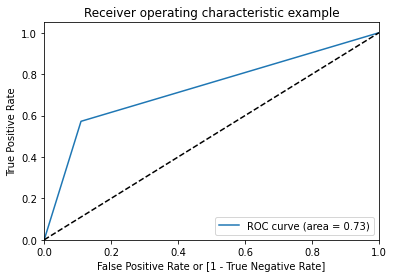

(array([0.        , 0.10994764, 1.        ]),
 array([0.        , 0.57216495, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [107]:
draw_roc(y_pred_final['Churn'],y_pred_final['Predicted'])

In [108]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,Churn,CustID,Churn_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,942,0.497860,0,1,1,1,1,1,0,0,0,0,0
1,1,3730,0.370391,0,1,1,1,1,0,0,0,0,0,0
2,0,1761,0.006723,0,1,0,0,0,0,0,0,0,0,0
3,1,2283,0.636464,1,1,1,1,1,1,1,1,0,0,0
4,0,1872,0.007508,0,1,0,0,0,0,0,0,0,0,0


In [109]:
cutoff_df = pd.DataFrame(columns=['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.275829  1.000000  0.000000
0.1   0.1  0.605687  0.943299  0.477094
0.2   0.2  0.695261  0.829897  0.643979
0.3   0.3  0.751659  0.743986  0.754581
0.4   0.4  0.783412  0.666667  0.827880
0.5   0.5  0.802370  0.572165  0.890052
0.6   0.6  0.794787  0.408935  0.941754
0.7   0.7  0.757820  0.176976  0.979058
0.8   0.8  0.727962  0.013746  1.000000
0.9   0.9  0.724171  0.000000  1.000000


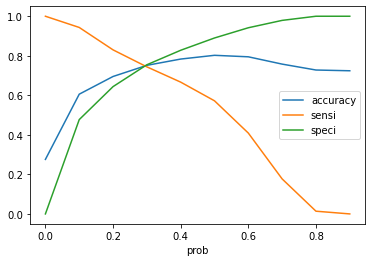

In [110]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [111]:
    y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

In [112]:
y_pred_final.head()

,Churn,CustID,Churn_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,942,0.497860,0,1,1,1,1,1,0,0,0,0,0,1
1,1,3730,0.370391,0,1,1,1,1,0,0,0,0,0,0,1
2,0,1761,0.006723,0,1,0,0,0,0,0,0,0,0,0,0
3,1,2283,0.636464,1,1,1,1,1,1,1,1,0,0,0,1
4,0,1872,0.007508,0,1,0,0,0,0,0,0,0,0,0,0


In [113]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.Churn, y_pred_final.final_predicted)

0.7516587677725118

In [114]:
metrics.confusion_matrix( y_pred_final.Churn, y_pred_final.final_predicted )

array([[1153,  375],
       [ 149,  433]], dtype=int64)